# Business Case

FicZon Inc is an IT solution provider with products ranging from on-
premises products to SAAS based solutions. FicZon major leads

FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.


# Project Goals

1. **Data Exploration Insights - sales Effectiveness.**
2. **ML Model to Predict The Lead Category (High Potential , Low Potential)**

# Loading of Dataset from the DataBase

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
connection = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team2',
                                    password = 'DM!$Team&27@9!20!',
                                    database='project_sales')

In [3]:
cursor=connection.cursor()
cursor.execute('show databases')

for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [4]:
db_tables = pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [5]:
data = pd.read_sql_query('select * from data',connection)

In [6]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Dataset Description

* **Data Shape** :The data has 8 quantitative input variables, and 1 quantitative output variable with 7422 observations.

# Data Attributes

1. **Created**: This column likely indicates the date and time when the record was created or entered into the system. It helps in tracking when the entry was made.

2. **Product_ID**: This column likely contains identifiers for the products or services that were sold or offered during the interaction. It serves to link the sales or interactions with specific products or services.

3. **Source**: This column probably indicates the source or channel through which the interaction or sale occurred. It could include channels like online platforms, referrals, direct sales, etc.

4. **Mobile**: This column may contain information about whether the interaction was conducted via a mobile device. It could be a binary indicator (e.g., 1 for mobile, 0 for non-mobile) or contain specific mobile identifiers.

5. **EMAIL**: This column likely contains the email addresses of the customers or leads associated with the interaction. It serves as a means of communication and contact information.

6. **Sales_Agent**: This column probably contains the names or identifiers of the sales agents or representatives who handled the interaction or sale. It helps in tracking individual performance or attributing sales to specific agents.

7. **Location**: This column may indicate the geographic location associated with the interaction or sale. It could be a country, region, city, or any other geographical identifier.

8. **Delivery_Mode**: This column likely indicates the mode or method of delivery for the products or services purchased. It could include options like physical delivery, digital delivery, pickup, etc.

9. **Status**: This column probably indicates the current status or stage of the interaction or sale. It could include statuses such as 'Pending', 'Completed', 'Cancelled', etc., depending on the lifecycle of the sales process.

# Project Process Steps

1. **Importing all the neccesary libraries**
2. **Understanding the data/ Insights from data**
3. **Exploratory Data Analysis (EDA)**
4. **Data Pre-processing**
5. **Feature Selection**
6. **Model Creation and Evaluation**
7. **Conclusion**

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,classification_report,recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Understanding The Data

In [8]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Basic Checks

In [9]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [10]:
data.describe(include='O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [12]:
# Dropping of columns which are not helpfull in building of model

data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [13]:
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...
7323,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7324,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7325,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7326,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### Encoding of columns as if they are many categories

In [14]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [15]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)

In [16]:
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [17]:
data.Status.replace(['Potential', 'CONVERTED', 'Open', 'converted', 'In Progress Positive', 'Just Enquiry', 'Long Term'],'High_Potential',inplace=True)
data.Status.replace(['Not Responding', 'Junk Lead', 'In Progress Negative', 'LOST'],'Low_Potential',inplace=True)

# EDA 

## 1. UNIVARIATE ANALYSIS

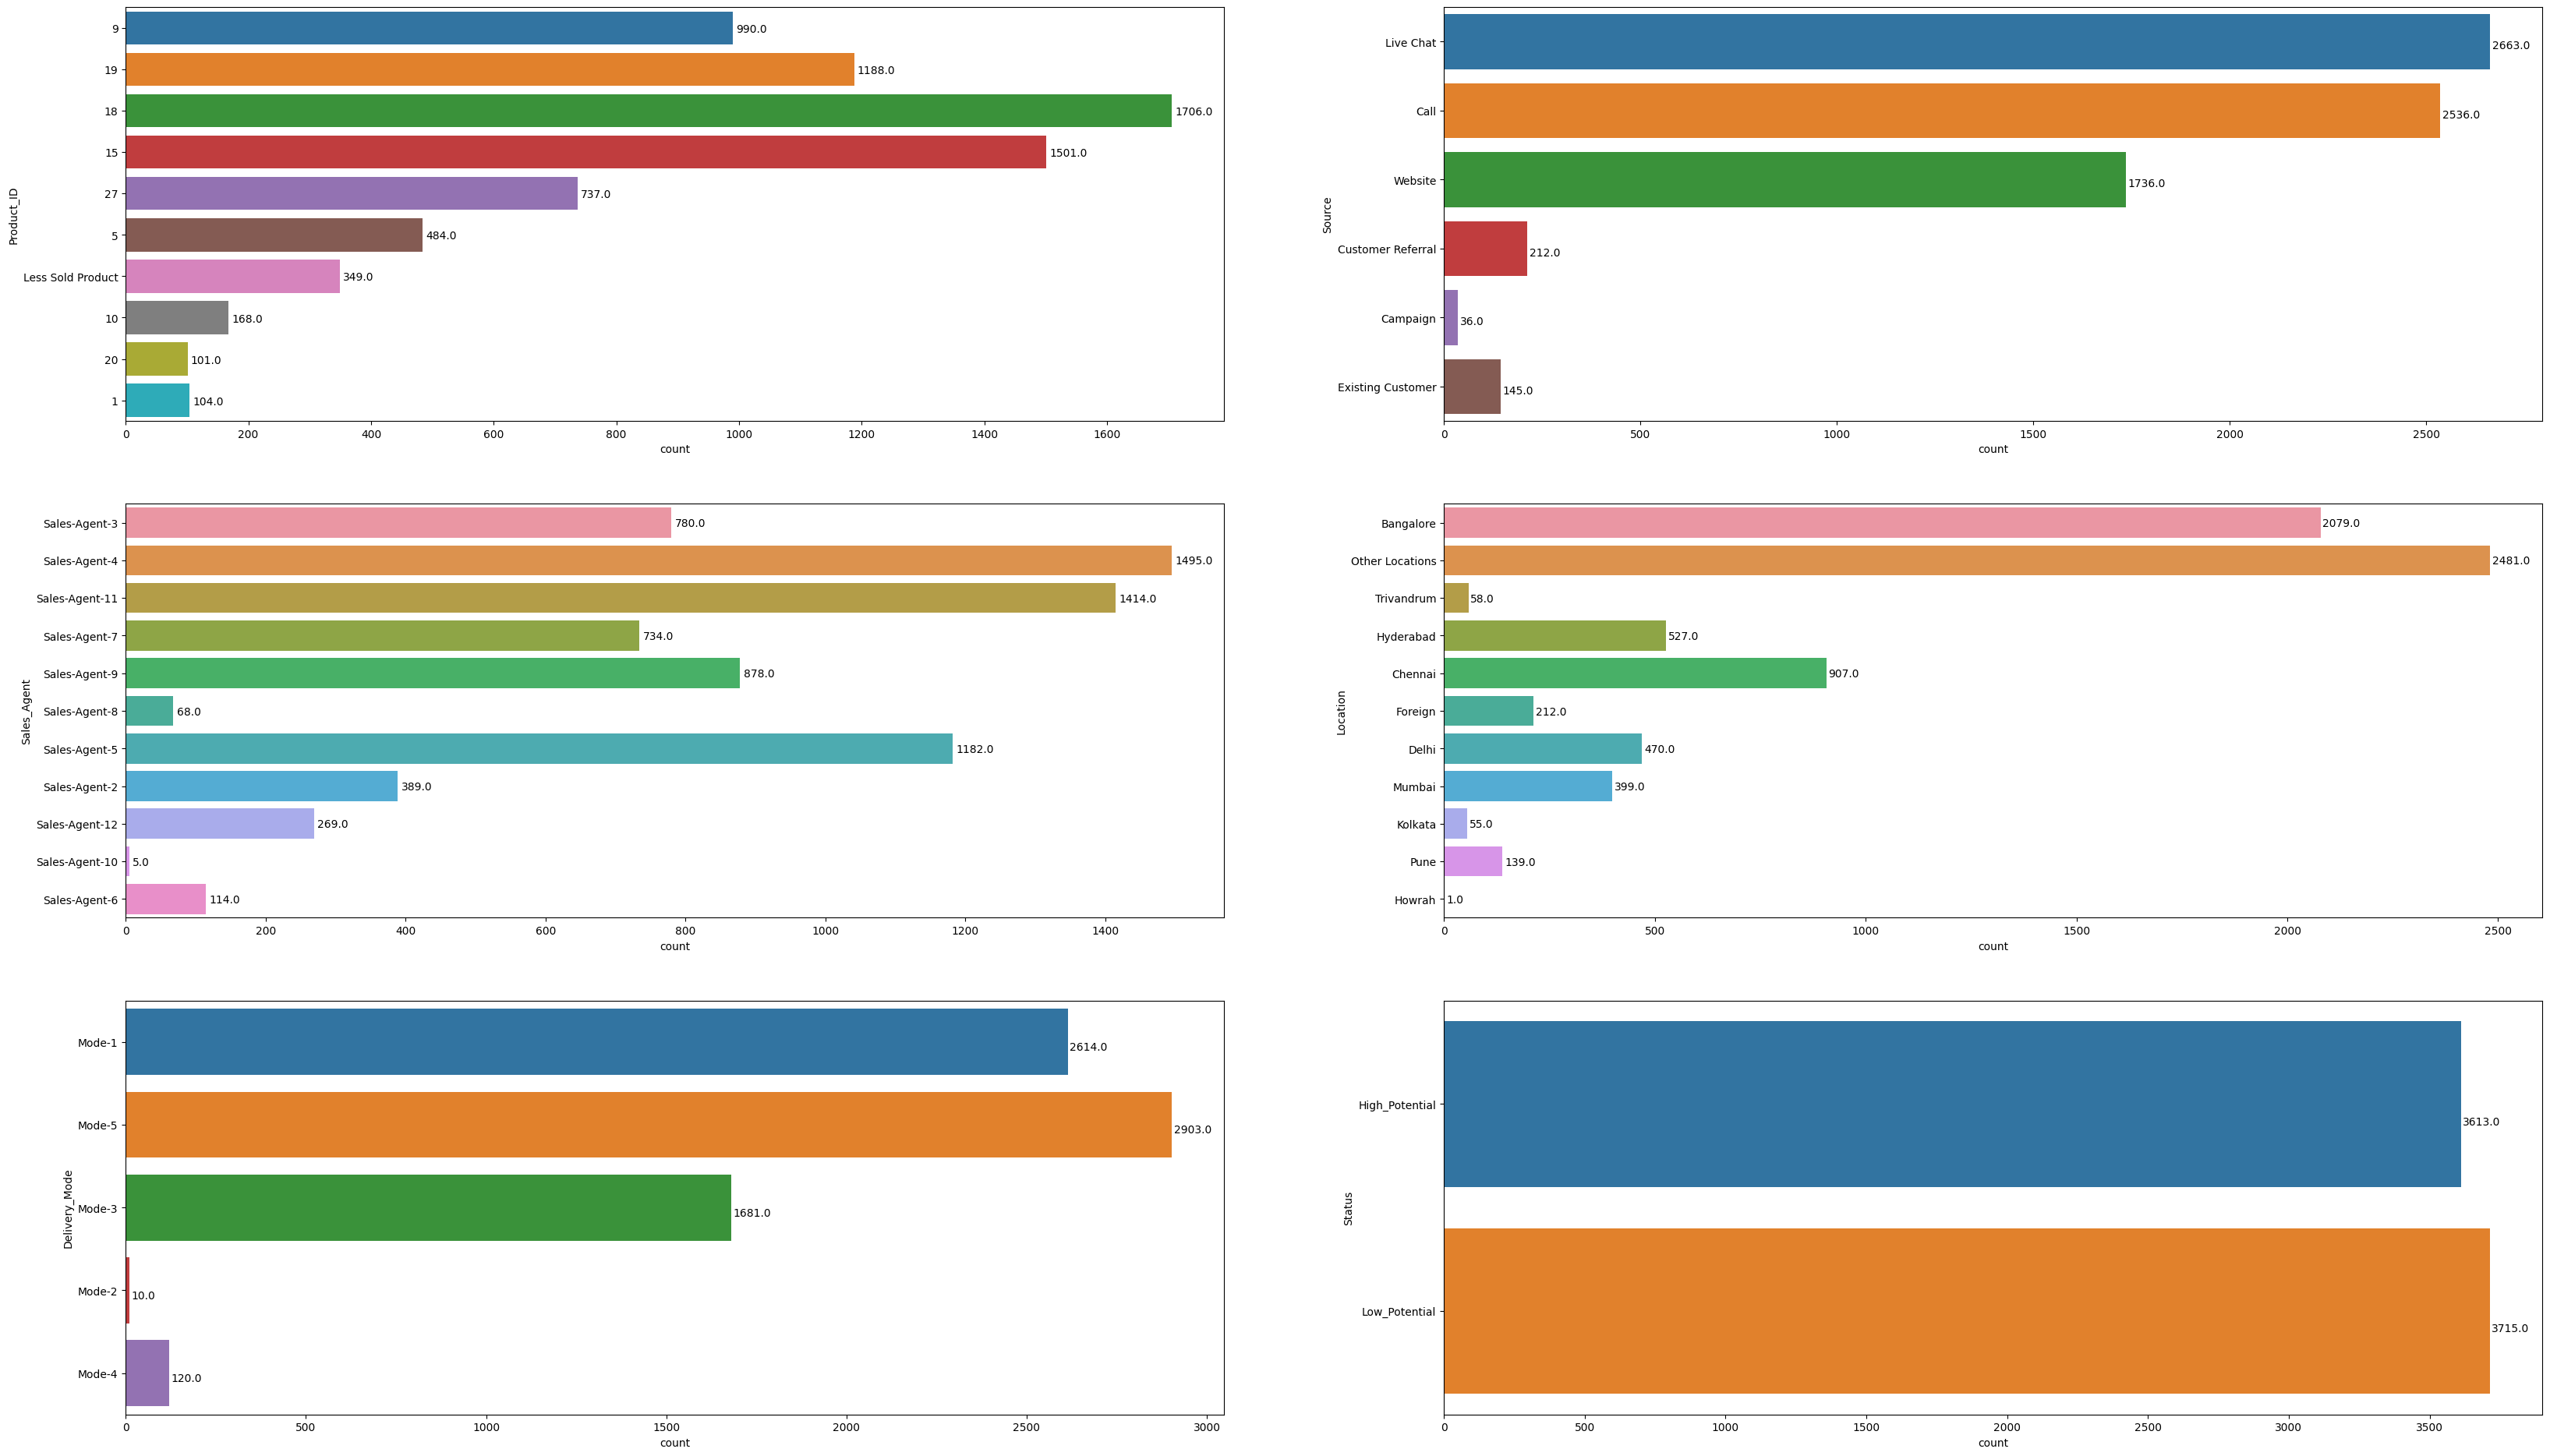

In [18]:
plt.figure(figsize=(40,40), facecolor='white')
pltno=1

for col in data:
    if pltno<=10:
        ax=plt.subplot(5,2,pltno)
        sns.countplot(y=data[col])
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(f'{p.get_width()}', (p.get_width()+5, p.get_y()+0.5))
            
    pltno+=1

plt.show()

# Insights
* In **product ID** we can see that for 9, 19, 18, 15, 27, 5 has higher counts compared to others.
* For **Source** in live chats, call and websites much higher counts than other three.
* **Sales Agents**(8,6,10) are having very less counts compared to other sales agents.
* We have more number of records in banglore and other locations followed by chennai, hyderabad, delhi and mumbai. And howrah, pune, kolkata, trivandrum and foreign **locations** have very less records compared to other locations.
* In **Delivery mode** we have more observations for mode-1,5,3 compared to mode-2,4.
* In **status** we can see that data is balanced for both High and low potential leads.

## 2. BIVARIATE ANALYSIS

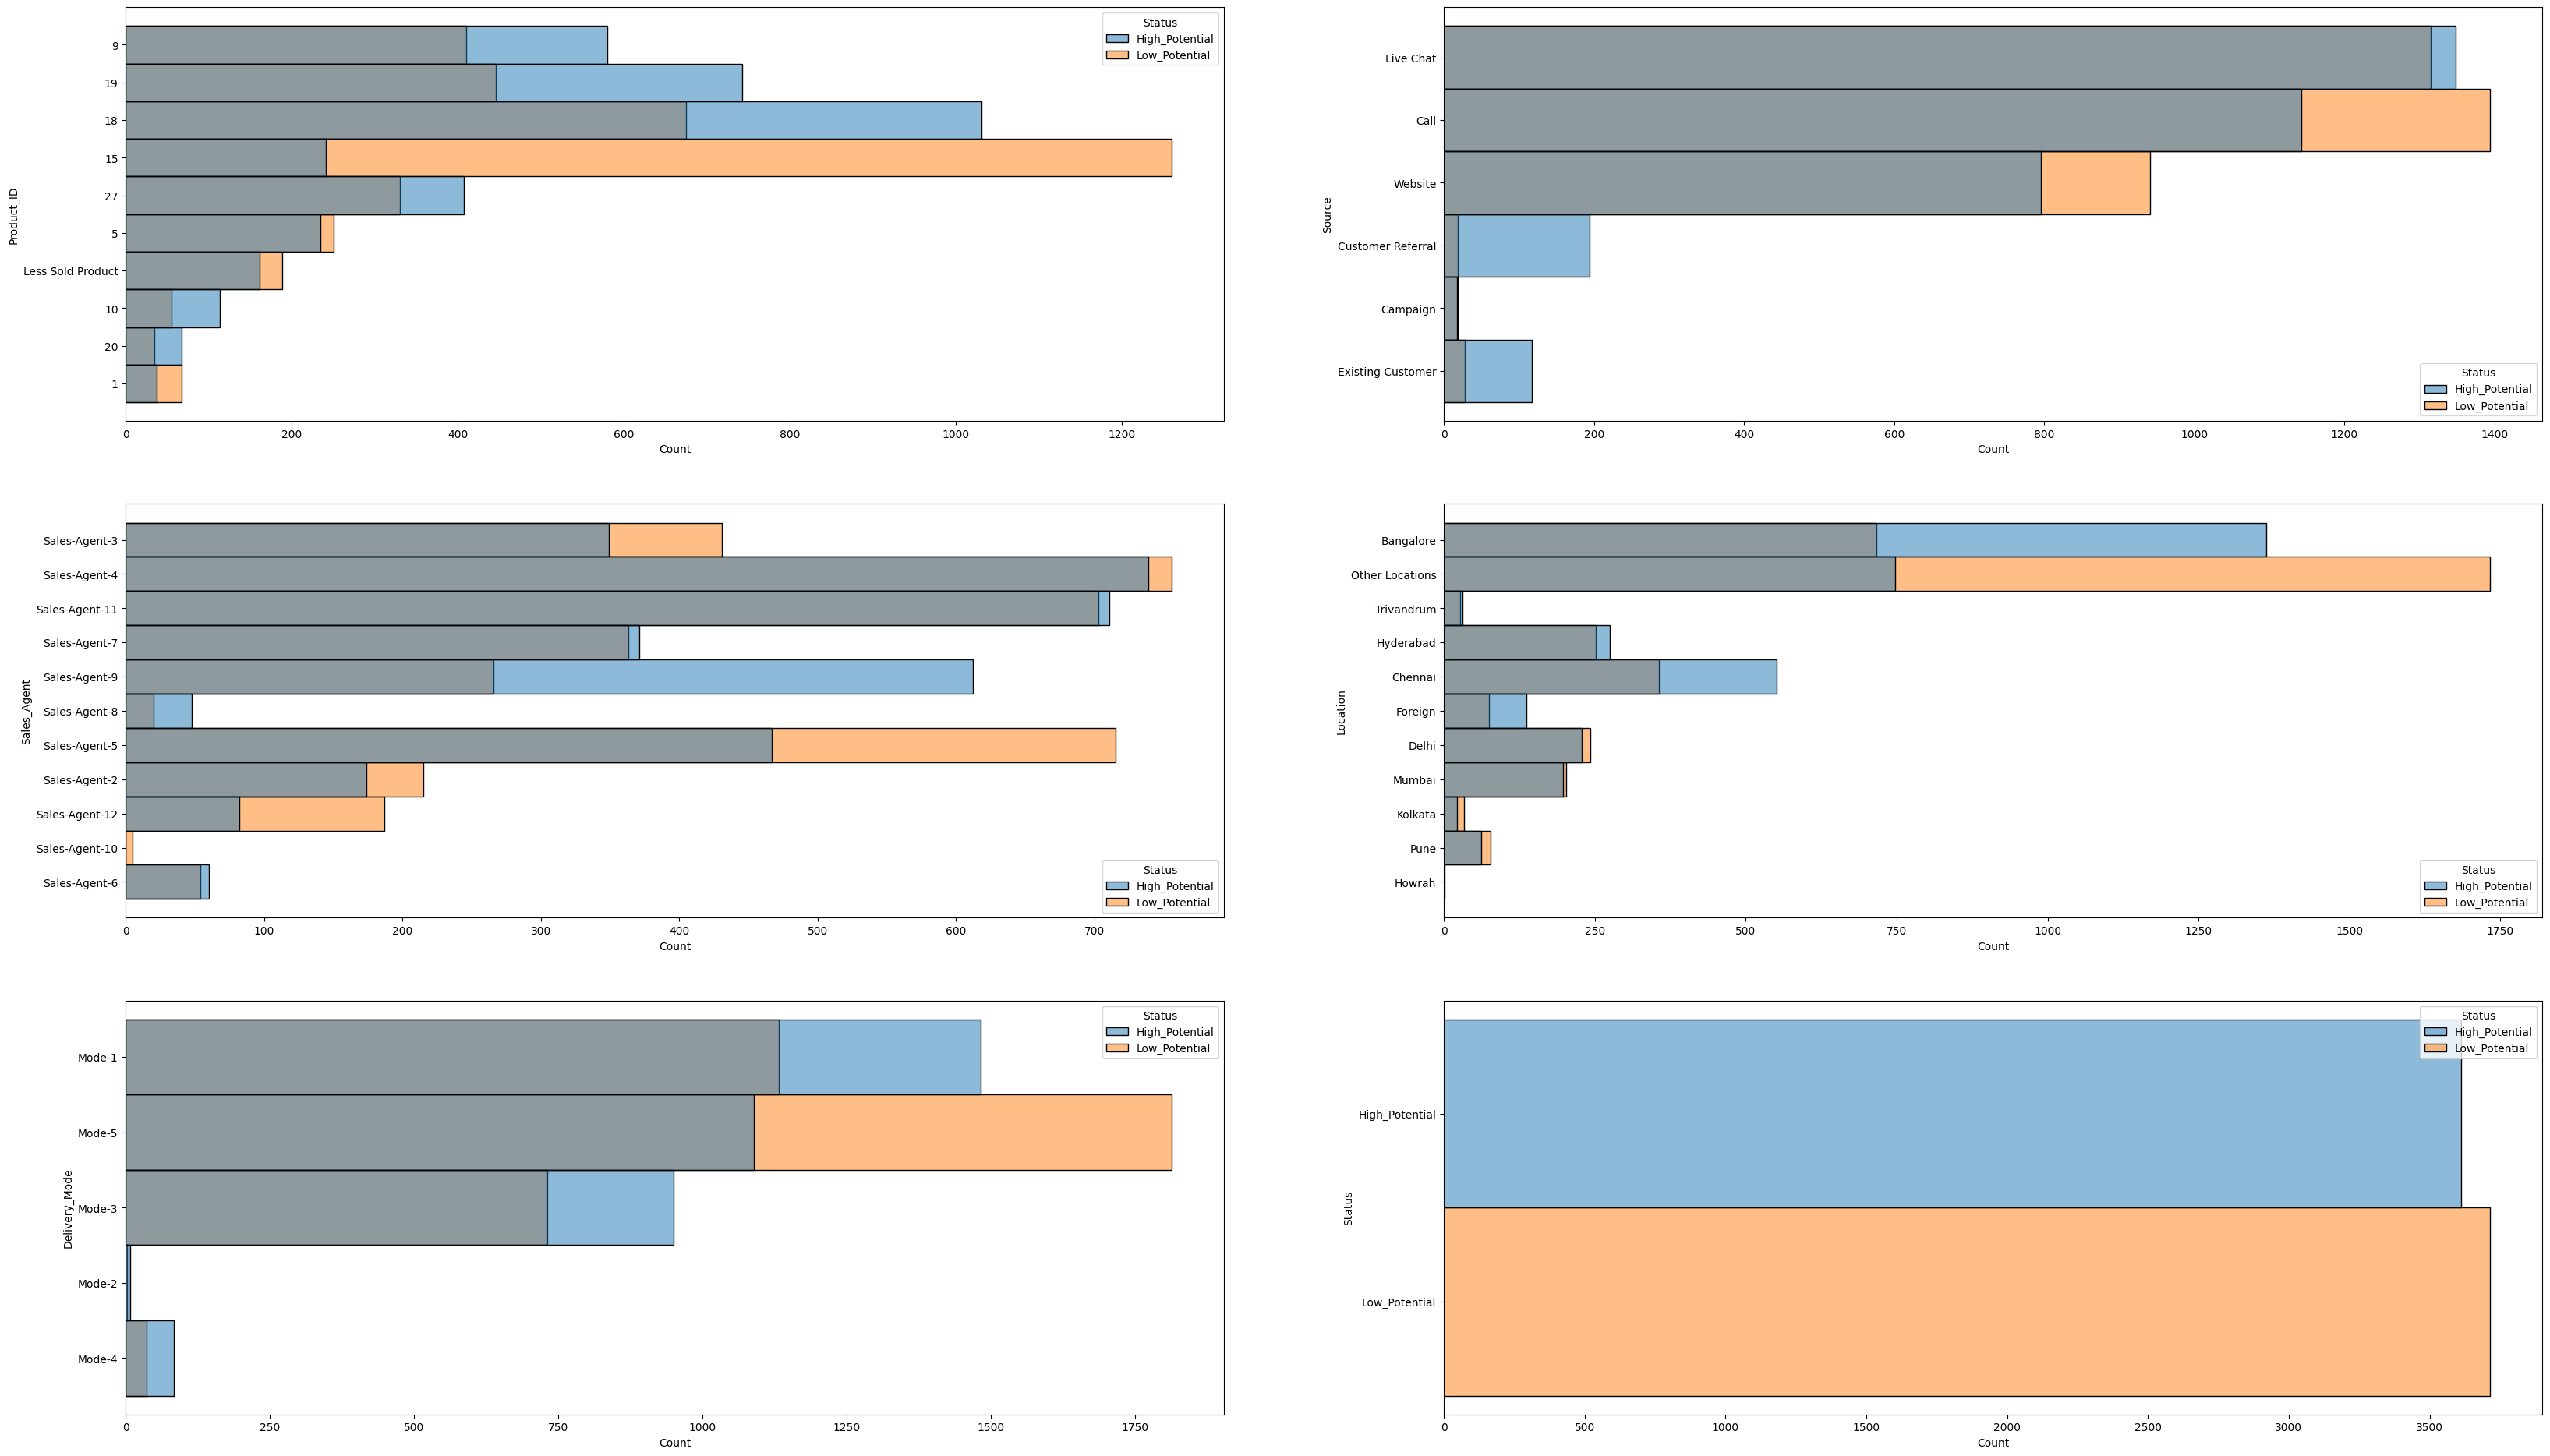

In [19]:
plt.figure(figsize=(40,40),facecolor='white')
pltno=1

for col in data:
    if pltno<=10:
        ax=plt.subplot(5,2,pltno)
        sns.histplot(y=data[col],hue=data['Status'])
    pltno+=1
plt.show()

# Insights
* In **product ID** we can see that for 9, 19, 18 & 27 we have more high potential leads and 15 has more number of lower potential leads.
* In **source** live chat, customer referral and existing customer has highest potential leads and call and website has low potential leads.
* **Sales Agents**(11, 7, 9, 8, 6) have more number of high potential leads. And for other sales agents have more low potential leads.
* In Banglore, Chennai, Hyderabad and Foreign **Locations** have high number of high potential leads and other locations, Delhi, Kolkata and pune have high low potential leads.
* Mode-1, 3 & 4 have high number of high potential leads and in Mode-5 we have high number of low potential leads.

# MULTIVARIATE ANALYSIS

In [42]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA PREPROCESSING 

In [20]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

### Encoding of data using MAP-Function

In [21]:
data.Product_ID.unique()

array(['9', '19', '18', '15', '27', '5', 'Less Sold Product', '10', '20',
       '1'], dtype=object)

In [22]:
data.loc[data['Product_ID']=='Less Sold Product', 'Product_ID'] = 0

In [23]:
data['Source'] = data['Source'].map({'Campaign':0, 'Existing Customer':1, 'Customer Referral':2, 'Website':3, 'Call':4, 'Live Chat':5,'Less Sold Product':6})

In [24]:
data['Sales_Agent'] = data['Sales_Agent'].map({'Sales-Agent-10':0, 'Sales-Agent-8':1, 'Sales-Agent-6':2, 'Sales-Agent-12':3, 'Sales-Agent-2':4, 'Sales-Agent-7':5, 'Sales-Agent-3':6,
                                               'Sales-Agent-9':7, 'Sales-Agent-5':8, 'Sales-Agent-11':9, 'Sales-Agent-4':10})

In [25]:
data.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'Foreign', 'Delhi', 'Mumbai', 'Kolkata', 'Pune',
       'Howrah'], dtype=object)

In [26]:
data['Location'] = data['Location'].map({'Howrah':0, 'Kolkata':1, 'Trivandrum':2, 'Pune':3, 'Foreign':4, 'Mumbai':5, 'Delhi':6, 'Hyderabad':7,
                                         'Chennai':8, 'Bangalore':9, 'Other Locations':10})

In [27]:
data['Delivery_Mode'] = data['Delivery_Mode'].map({'Mode-2':0, 'Mode-4':1, 'Mode-3':2, 'Mode-1':3, 'Mode-5':4})

In [28]:
data['Status'] = data['Status'].map({'High_Potential':0, 'Low_Potential':1})

In [29]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,5,6,9,3,0
1,19,4,10,10,4,0
2,18,3,9,2,3,0
3,15,3,5,7,3,1
4,18,4,5,9,3,0
...,...,...,...,...,...,...
7323,9,4,2,5,1,1
7324,15,4,3,10,4,1
7325,5,5,9,9,3,1
7326,0,1,10,10,3,0


###  Scaling of data using minmaxscaler()

In [30]:
scale = MinMaxScaler()

df = scale.fit_transform(data)

In [31]:
df1 = pd.DataFrame(df , columns =['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'])

In [32]:
df1

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.333333,1.0,0.6,0.9,0.75,0.0
1,0.703704,0.8,1.0,1.0,1.00,0.0
2,0.666667,0.6,0.9,0.2,0.75,0.0
3,0.555556,0.6,0.5,0.7,0.75,1.0
4,0.666667,0.8,0.5,0.9,0.75,0.0
...,...,...,...,...,...,...
7323,0.333333,0.8,0.2,0.5,0.25,1.0
7324,0.555556,0.8,0.3,1.0,1.00,1.0
7325,0.185185,1.0,0.9,0.9,0.75,1.0
7326,0.000000,0.2,1.0,1.0,0.75,0.0


# Feauture Selection

<Axes: >

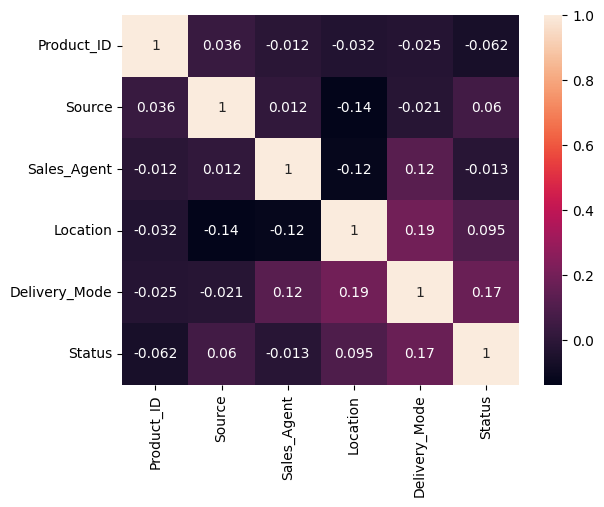

In [33]:
sns.heatmap(df1.corr(),annot=True)

# Model Creation

In [34]:
x = df1.drop('Status',axis=1)
y = data['Status']

In [35]:
data.Status.value_counts()

1    3715
0    3613
Name: Status, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_sampled,y_sampled = oversample.fit_resample(x_train,y_train)

In [38]:
x_sampled

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.555556,0.8,0.9,1.000000,1.00
1,0.703704,1.0,0.7,0.600000,0.75
2,0.555556,0.8,0.4,1.000000,1.00
3,0.333333,0.8,1.0,0.900000,0.75
4,0.555556,0.6,0.8,0.500000,0.50
...,...,...,...,...,...
5633,0.666667,1.0,0.5,0.900000,0.75
5634,0.666667,1.0,0.8,1.000000,0.50
5635,0.342370,0.6,0.5,0.848798,0.50
5636,0.666667,0.6,1.0,1.000000,1.00


In [39]:
y_sampled.value_counts()

0    2819
1    2819
Name: Status, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
# Assuming x_train, y_train, x_test, and y_test are already defined
# You can replace them with your actual training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
def run_multipe_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        cr = classification_report(y_test,y_pred)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'recall score': recall,
            'precision score': precision,
            'Report' : cr
        }

    return results

model_to_run = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'neighbors':KNeighborsClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier()
}

results = run_multipe_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Precision Score : {scores['precision score']}")
    print('--'*30)
    print(f"Report: {scores['Report']}")
    print('==' * 30)
    print('=='*30)

Model: LogisticRegression
Accuracy: 0.5780567685589519
F1 Score: 0.6033863519753719
Recall score : 0.65625
Precision Score : 0.5584045584045584
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.60      0.50      0.55       936
           1       0.56      0.66      0.60       896

    accuracy                           0.58      1832
   macro avg       0.58      0.58      0.58      1832
weighted avg       0.58      0.58      0.58      1832

Model: SVM
Accuracy: 0.6572052401746725
F1 Score: 0.622141997593261
Recall score : 0.5770089285714286
Precision Score : 0.674934725848564
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.64      0.73      0.69       936
           1       0.67      0.58      0.62       896

    accuracy                           0.66      1832
   macro avg       0.66      0.66  

# ADDING HYPERPARAMETER TUNING

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# Define a function to run multiple algorithms
def run_multiple_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, (model_class, hyperparams) in models.items():
        # Initialize the model with hyperparameters
        model = model_class(**hyperparams)

        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        cr = classification_report(y_test,y_pred)


        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'recall score': recall,
            'precision score': precision,
            'Report' : cr
        }

    return results

# Define models along with their hyperparameters
model_to_run = {
    'LogisticRegression': (LogisticRegression, {'C': 0.1, 'solver': 'liblinear'}),
    'SVM': (SVC, {'kernel': 'linear', 'C': 1.0}),
    'KNeighbors': (KNeighborsClassifier, {'n_neighbors': 5}),
    'DecisionTree': (DecisionTreeClassifier, {'max_depth': 5}),
    'RandomForest': (RandomForestClassifier, {'n_estimators': 100, 'max_depth': 5}),
    'XGBClassifier': (XGBClassifier, {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 65, 'max_depth': 19, 'learning_rate': 0.03, 'gamma': 12.4})
}

# Obtain results
results = run_multiple_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Precision Score : {scores['precision score']}")
    print('--'*30)
    print(f"Report: {scores['Report']}")
    print('==' * 30)
    print('==' * 30)

Model: LogisticRegression
Accuracy: 0.5764192139737991
F1 Score: 0.6096579476861167
Recall score : 0.6763392857142857
Precision Score : 0.554945054945055
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.61      0.48      0.54       936
           1       0.55      0.68      0.61       896

    accuracy                           0.58      1832
   macro avg       0.58      0.58      0.57      1832
weighted avg       0.58      0.58      0.57      1832

Model: SVM
Accuracy: 0.5605895196506551
F1 Score: 0.6067415730337078
Recall score : 0.6930803571428571
Precision Score : 0.5395308427454387
------------------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.60      0.43      0.50       936
           1       0.54      0.69      0.61       896

    accuracy                           0.56      1832
   macro avg       0.57

# Conclusion

### As we can see that score for the above models are between 60 to 70 .
### In which the RandomForestClassifier with hyperparams is giving the best scores.